In [1]:
import tensorflow as tf 

In [4]:
import os
main_path = "Datasets/dogs-vs-cats"
train = os.path.join(main_path,'train')
train = os.path.normpath('Datasets/dogs-vs-cats/train')

test = os.path.join(main_path,'test')
test = os.path.normpath('Datasets/dogs-vs-cats/test')

train_cats_path = os.path.join(train,'cats')
train_cats_path = os.path.normpath('Datasets/dogs-vs-cats/train/cats')

train_dogs_path = os.path.join(train,'dogs')
train_dogs_path = os.path.normpath('Datasets/dogs-vs-cats/train/dogs')

# train_cats = os.mkdir(train_cats_path)
# train_dogs = os.mkdir(train_dogs_path)



In [5]:
print(len(os.listdir(os.path.join('Datasets/dogs-vs-cats/test/cats'))))
# print(train_dogs)

10000


In [4]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255, shear_range=0.2,fill_mode='nearest',horizontal_flip=True,vertical_flip=True)


validation_data_gen = ImageDataGenerator(rescale=1/255)


train = train_data_gen.flow_from_directory(train,target_size=(150,150),class_mode ='binary')
validation = validation_data_gen.flow_from_directory(test,target_size=(150,150),class_mode='binary')


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 2 classes.


In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation = 'relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [8]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [9]:
history = model.fit(train,batch_size = 32,epochs=20,validation_data=validation)

Epoch 1/20
782/782 [==============================] - 213s 268ms/step - loss: 0.6250 - accuracy: 0.6598 - val_loss: 0.5018 - val_accuracy: 0.7780
Epoch 2/20
782/782 [==============================] - 160s 205ms/step - loss: 0.5271 - accuracy: 0.7389 - val_loss: 0.4760 - val_accuracy: 0.7724
Epoch 3/20
782/782 [==============================] - 158s 203ms/step - loss: 0.4746 - accuracy: 0.7774 - val_loss: 0.3932 - val_accuracy: 0.8337
Epoch 4/20
782/782 [==============================] - 164s 210ms/step - loss: 0.4453 - accuracy: 0.7918 - val_loss: 0.3291 - val_accuracy: 0.8623s - loss: 0.4472 - accuracy: 0.79 - ETA: 7s - loss: 0.446 - ETA: 6s - loss: 0.4463  - ETA: 0s - loss: 0.4454 - accuracy
Epoch 5/20
782/782 [==============================] - 162s 207ms/step - loss: 0.4195 - accuracy: 0.8084 - val_loss: 0.3246 - val_accuracy: 0.8733
Epoch 6/20
782/782 [==============================] - 165s 212ms/step - loss: 0.3924 - accuracy: 0.8255 - val_loss: 0.3956 - val_accuracy: 0.8237
Epoch

<Figure size 14400x7200 with 0 Axes>

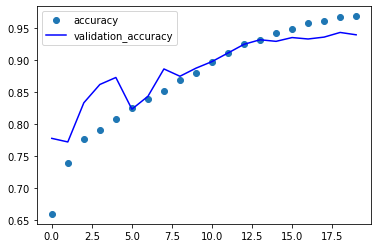

<Figure size 14400x7200 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt


# plt.figsiz

acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(len(acc))
plt.plot(epochs,acc,'o',label='accuracy')
plt.plot(epochs,val,'b',label='validation_accuracy')
plt.legend()

plt.figure(figsize=(200,100))



In [28]:
import cv2 as cv
import numpy as np

cap = cv.imread('Datasets/dogs-vs-cats/test2/50.jpg')

img = cv.resize(cap,(150,150))
img = img/255
img = np.reshape(img,(1,150,150,3))
img = np.vstack([img])

result = model.predict(img)

print(result)

[[0.37736788]]
